In [1]:
import quandl
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from talib import RSI
from talib import MACD
from talib import ATR

%matplotlib inline

In [2]:
# Enter your own quandl API key here
quandl.ApiConfig.api_key = ""

In [3]:
mydata = quandl.get("WIKI/MO", start_date="2015-01-01", end_date="2017-2-28")
len(mydata)

543

In [4]:
mydata.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,49.30,49.64,48.58,48.97,6077766.0,0.0,1.0,44.427541,44.733938,43.778701,44.130156,6077766.0
2015-01-05,48.64,48.99,48.52,48.69,6900488.0,0.0,1.0,43.832771,44.148179,43.724631,43.877829,6900488.0
2015-01-06,49.00,49.65,48.89,48.98,7239944.0,0.0,1.0,44.157191,44.742950,44.058063,44.139168,7239944.0
2015-01-07,49.33,50.03,49.32,49.88,5492436.0,0.0,1.0,44.454576,45.085393,44.445564,44.950218,5492436.0
2015-01-08,50.26,50.93,50.20,50.72,4693280.0,0.0,1.0,45.292662,45.896444,45.238592,45.707198,4693280.0


In [5]:
mydata.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-02-22,73.55,73.76,73.29,73.60,4401162.0,0.0,1.0,71.613741,71.818213,71.360586,71.662425,4401162.0
2017-02-23,73.81,74.55,73.69,74.46,4116768.0,0.0,1.0,71.866896,72.587415,71.750055,72.499785,4116768.0
2017-02-24,74.36,74.71,74.26,74.43,4959965.0,0.0,1.0,72.402417,72.743203,72.305050,72.470574,4959965.0
2017-02-27,74.48,74.76,74.44,74.59,6319918.0,0.0,1.0,72.519258,72.791887,72.480311,72.626362,6319918.0
2017-02-28,74.32,75.14,74.30,74.92,7160929.0,0.0,1.0,72.363470,73.161883,72.343997,72.947675,7160929.0


In [6]:
mydata.index = pd.to_datetime(mydata.index)
mydata.index 

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2017-02-14', '2017-02-15', '2017-02-16', '2017-02-17',
               '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28'],
              dtype='datetime64[ns]', name='Date', length=543, freq=None)

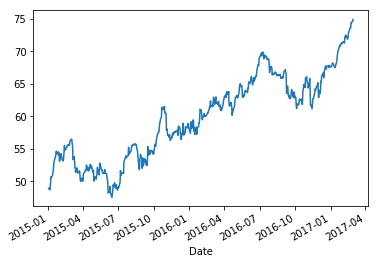

In [7]:
(mydata['Close']).plot()

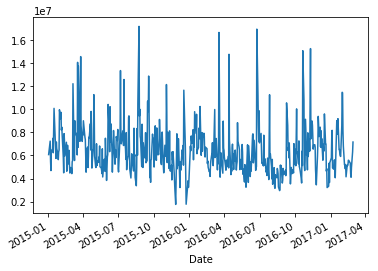

In [8]:
(mydata['Volume']).plot()

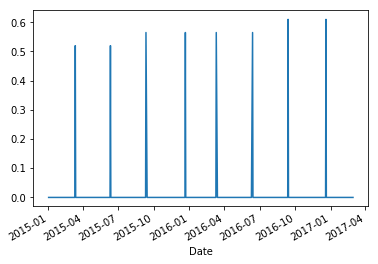

In [9]:
(mydata['Ex-Dividend']).plot()

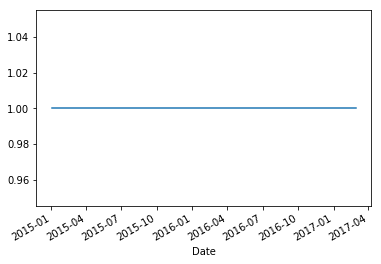

In [10]:
(mydata['Split Ratio']).plot()

543


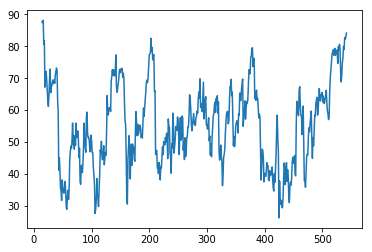

In [11]:
# Generate RSI values
rsi = RSI(mydata['Close'].values, timeperiod=14)
print(len(rsi))
plt.plot(rsi)

In [12]:
# Generate MACD values
macd, macdsignal, macdhist = MACD(mydata['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
print(len(macdsignal))

543


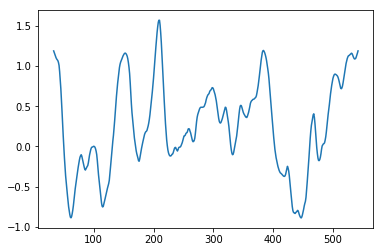

In [13]:
plt.plot(macdsignal)

543


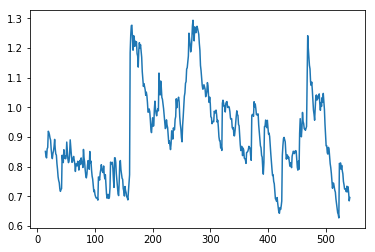

In [14]:
# Generate ATR values
real = ATR(mydata['High'].values, mydata['Low'].values, mydata['Close'].values, timeperiod=14)
print(len(real))
plt.plot(real)

In [15]:
mydata['RSI'] = rsi
mydata['MACD'] = macdsignal
mydata['ATR'] = real

In [16]:
mydata.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,RSI,MACD,ATR
Date,,,,,,,,,,,,,,,
2015-01-02,49.30,49.64,48.58,48.97,6077766.0,0.0,1.0,44.427541,44.733938,43.778701,44.130156,6077766.0,NaN,NaN,NaN
2015-01-05,48.64,48.99,48.52,48.69,6900488.0,0.0,1.0,43.832771,44.148179,43.724631,43.877829,6900488.0,NaN,NaN,NaN
2015-01-06,49.00,49.65,48.89,48.98,7239944.0,0.0,1.0,44.157191,44.742950,44.058063,44.139168,7239944.0,NaN,NaN,NaN
2015-01-07,49.33,50.03,49.32,49.88,5492436.0,0.0,1.0,44.454576,45.085393,44.445564,44.950218,5492436.0,NaN,NaN,NaN
2015-01-08,50.26,50.93,50.20,50.72,4693280.0,0.0,1.0,45.292662,45.896444,45.238592,45.707198,4693280.0,NaN,NaN,NaN


In [17]:
mydata.dropna( inplace=True)

In [18]:
mydata.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,RSI,MACD,ATR
Date,,,,,,,,,,,,,,,
2015-02-20,55.43,55.700,54.910,55.61,6882578.0,0.0,1.0,49.951696,50.195011,49.483089,50.113906,6882578.0,69.427910,1.189718,0.838562
2015-02-23,55.74,55.904,55.470,55.51,5265659.0,0.0,1.0,50.231058,50.378849,49.987743,50.023789,5265659.0,68.280760,1.168106,0.809665
2015-02-24,55.67,55.890,55.350,55.72,6443684.0,0.0,1.0,50.167976,50.366233,49.879602,50.213034,6443684.0,69.423324,1.146991,0.790403
2015-02-25,55.81,55.990,55.550,55.64,5125110.0,0.0,1.0,50.294139,50.456349,50.059836,50.140941,5125110.0,68.412332,1.123402,0.765374
2015-02-26,55.73,56.190,55.597,56.09,4479595.0,0.0,1.0,50.222046,50.636583,50.102191,50.546466,4479595.0,70.972991,1.104119,0.753062


In [19]:
corr_matrix = mydata.corr().abs()

In [20]:
corr_matrix

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,RSI,MACD,ATR
Open,1.000000,0.998078,0.998073,0.996136,0.189359,0.020888,NaN,0.997149,0.995194,0.995332,0.993601,0.189359,0.405196,0.401946,0.018812
High,0.998078,1.000000,0.997560,0.998428,0.167779,0.022778,NaN,0.995930,0.997188,0.995289,0.995901,0.167779,0.415216,0.401868,0.003926
Low,0.998073,0.997560,1.000000,0.998063,0.211457,0.024095,NaN,0.995831,0.995059,0.997242,0.995509,0.211457,0.421716,0.397065,0.032055
Close,0.996136,0.998428,0.998063,1.000000,0.188634,0.025691,NaN,0.994333,0.995900,0.995738,0.997243,0.188634,0.429871,0.401778,0.014472
Volume,0.189359,0.167779,0.211457,0.188634,1.000000,0.030810,NaN,0.178784,0.160653,0.197336,0.178165,1.000000,0.100577,0.020268,0.228406
Ex-Dividend,0.020888,0.022778,0.024095,0.025691,0.030810,1.000000,NaN,0.014246,0.015783,0.017055,0.018322,0.030810,0.081281,0.017573,0.042449
Split Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adj. Open,0.997149,0.995930,0.995831,0.994333,0.178784,0.014246,NaN,1.000000,0.998658,0.998648,0.997300,0.178784,0.378925,0.362178,0.016115
Adj. High,0.995194,0.997188,0.995059,0.995900,0.160653,0.015783,NaN,0.998658,1.000000,0.998292,0.998900,0.160653,0.387088,0.361812,0.003621
Adj. Low,0.995332,0.995289,0.997242,0.995738,0.197336,0.017055,NaN,0.998648,0.998292,1.000000,0.998647,0.197336,0.392924,0.358416,0.027295


In [21]:
corr_matrix.drop('Split Ratio',inplace=True)

corr_matrix.drop('Split Ratio', axis=1,inplace=True)

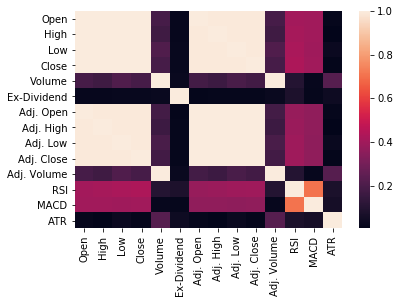

In [22]:
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns)

In [23]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [24]:
# Drop redundant features
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['High',
 'Low',
 'Close',
 'Adj. Open',
 'Adj. High',
 'Adj. Low',
 'Adj. Close',
 'Adj. Volume']

In [25]:
mydata['Split Ratio'].unique().tolist()

[1.0]

In [26]:
mydata['Ex-Dividend'].unique().tolist()

[0.0, 0.52, 0.565, 0.61]

In [27]:
mydata.groupby('Ex-Dividend').size()

Ex-Dividend
0.000    502
0.520      2
0.565      4
0.610      2
dtype: int64

In [28]:
to_drop.remove("Close")
to_drop.append("Open")
to_drop.append('Ex-Dividend')
to_drop.append('Split Ratio')
indices_dropped = [mydata.columns.get_loc(column) for column in to_drop]
mydata.drop(mydata.columns[indices_dropped], axis=1, inplace=True)

In [29]:
train_set = mydata.loc[:'2016-12-30']
test_set = mydata.loc['2017-01-03':]

In [30]:
train_set.head()

,Close,Volume,RSI,MACD,ATR
Date,,,,,
2015-02-20,55.61,6882578.0,69.427910,1.189718,0.838562
2015-02-23,55.51,5265659.0,68.280760,1.168106,0.809665
2015-02-24,55.72,6443684.0,69.423324,1.146991,0.790403
2015-02-25,55.64,5125110.0,68.412332,1.123402,0.765374
2015-02-26,56.09,4479595.0,70.972991,1.104119,0.753062


In [31]:
test_set.head()

,Close,Volume,RSI,MACD,ATR
Date,,,,,
2017-01-03,67.63,5799537.0,62.114079,0.899746,0.842042
2017-01-04,67.85,7552957.0,63.598455,0.895611,0.864753
2017-01-05,67.93,8173433.0,64.148534,0.888319,0.858699
2017-01-06,68.23,4925919.0,66.210595,0.882194,0.836014
2017-01-09,67.95,4815853.0,62.592040,0.870642,0.809820


In [32]:
from environment import Environment
from agent import Agent

initial_balance = 5000

environment = Environment(initial_balance, train_set)
agent = Agent(environment)

Using TensorFlow backend.


In [33]:
# Training agent over 2000 episodes

import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['Time','Rewards','Average Rewards', 'Balance','Epsilon'])

episodes = 2000

total_rewards = 0.0
avg_rewards = 0.0
max_reward = 0

for e in range(1, episodes+1):

    state = environment.reset()
    
    rewards = 0

    while True:

        # Decide action
        action = agent.act(state)
        # Advance the game to the next frame based on the action.

        next_state, reward, done = environment.step(action)        
        rewards += reward

        # Remember the previous state, action, reward, and done
        agent.remember(state, action, reward, next_state, done)

        # make next_state the new current state for the next frame.
        state = next_state
        
        if done:
            total_rewards += rewards
            avg_rewards = total_rewards/ e
            
            if rewards > max_reward:
                max_reward = rewards
            print("Episode: {}, Reward: {:7.3f}, Avg Reward: {:7.3f}, Max Reward: {:7.3f}, Final balance: {:7.3f}"
                .format(e, rewards, avg_rewards, max_reward, environment.final_balance))
            df.loc[e] = [e, rewards, avg_rewards, environment.final_balance, agent.epsilon]
            break
    #train the agent with the experience of the episode
    agent.replay(32)
    
    #Added for double DQN
    agent.target_train()

Episode: 1, Reward: 828.212, Avg Reward: 828.212, Max Reward: 828.212, Final balance: 5828.212
Episode: 2, Reward: 950.600, Avg Reward: 889.406, Max Reward: 950.600, Final balance: 5950.600
Episode: 3, Reward: 562.396, Avg Reward: 780.403, Max Reward: 950.600, Final balance: 5562.396
Episode: 4, Reward: 486.171, Avg Reward: 706.845, Max Reward: 950.600, Final balance: 5486.171
Episode: 5, Reward: -563.784, Avg Reward: 452.719, Max Reward: 950.600, Final balance: 4436.216
Episode: 6, Reward: -1334.631, Avg Reward: 154.827, Max Reward: 950.600, Final balance: 3665.369
Episode: 7, Reward: -1621.023, Avg Reward: -98.865, Max Reward: 950.600, Final balance: 3378.977
Episode: 8, Reward: 586.946, Avg Reward: -13.139, Max Reward: 950.600, Final balance: 5586.946
Episode: 9, Reward: 923.698, Avg Reward:  90.954, Max Reward: 950.600, Final balance: 5923.698
Episode: 10, Reward: 1822.912, Avg Reward: 264.150, Max Reward: 1822.912, Final balance: 6822.912
Episode: 11, Reward: 1102.303, Avg Reward:

Episode: 85, Reward: -730.729, Avg Reward: 147.264, Max Reward: 1822.912, Final balance: 4269.271
Episode: 86, Reward: 1009.735, Avg Reward: 157.293, Max Reward: 1822.912, Final balance: 6009.735
Episode: 87, Reward: 1278.606, Avg Reward: 170.182, Max Reward: 1822.912, Final balance: 6278.606
Episode: 88, Reward: 686.974, Avg Reward: 176.054, Max Reward: 1822.912, Final balance: 5686.974
Episode: 89, Reward: -947.818, Avg Reward: 163.427, Max Reward: 1822.912, Final balance: 4052.182
Episode: 90, Reward: 968.634, Avg Reward: 172.373, Max Reward: 1822.912, Final balance: 5968.634
Episode: 91, Reward: 1688.154, Avg Reward: 189.030, Max Reward: 1822.912, Final balance: 6688.154
Episode: 92, Reward: 654.986, Avg Reward: 194.095, Max Reward: 1822.912, Final balance: 5654.986
Episode: 93, Reward: -1251.195, Avg Reward: 178.554, Max Reward: 1822.912, Final balance: 3748.805
Episode: 94, Reward: 788.717, Avg Reward: 185.045, Max Reward: 1822.912, Final balance: 5788.717
Episode: 95, Reward: 83

Episode: 168, Reward: -958.524, Avg Reward: 204.215, Max Reward: 3202.443, Final balance: 4041.476
Episode: 169, Reward: -1011.941, Avg Reward: 197.019, Max Reward: 3202.443, Final balance: 3988.059
Episode: 170, Reward: 943.392, Avg Reward: 201.410, Max Reward: 3202.443, Final balance: 5943.392
Episode: 171, Reward: 1056.298, Avg Reward: 206.409, Max Reward: 3202.443, Final balance: 6056.298
Episode: 172, Reward: 931.140, Avg Reward: 210.622, Max Reward: 3202.443, Final balance: 5931.140
Episode: 173, Reward: 1068.471, Avg Reward: 215.581, Max Reward: 3202.443, Final balance: 6068.471
Episode: 174, Reward: -1009.369, Avg Reward: 208.541, Max Reward: 3202.443, Final balance: 3990.631
Episode: 175, Reward: -1216.284, Avg Reward: 200.399, Max Reward: 3202.443, Final balance: 3783.716
Episode: 176, Reward: -1029.682, Avg Reward: 193.410, Max Reward: 3202.443, Final balance: 3970.318
Episode: 177, Reward: -380.451, Avg Reward: 190.168, Max Reward: 3202.443, Final balance: 4619.549
Episode:

Episode: 251, Reward: 1404.354, Avg Reward: 185.022, Max Reward: 3202.443, Final balance: 6404.354
Episode: 252, Reward: -224.650, Avg Reward: 183.396, Max Reward: 3202.443, Final balance: 4775.350
Episode: 253, Reward: -365.364, Avg Reward: 181.227, Max Reward: 3202.443, Final balance: 4634.636
Episode: 254, Reward: 1316.681, Avg Reward: 185.697, Max Reward: 3202.443, Final balance: 6316.681
Episode: 255, Reward: -636.677, Avg Reward: 182.472, Max Reward: 3202.443, Final balance: 4363.323
Episode: 256, Reward: -825.791, Avg Reward: 178.534, Max Reward: 3202.443, Final balance: 4174.209
Episode: 257, Reward: 746.328, Avg Reward: 180.743, Max Reward: 3202.443, Final balance: 5746.328
Episode: 258, Reward: 435.393, Avg Reward: 181.730, Max Reward: 3202.443, Final balance: 5435.393
Episode: 259, Reward: 818.679, Avg Reward: 184.189, Max Reward: 3202.443, Final balance: 5818.679
Episode: 260, Reward: 951.274, Avg Reward: 187.140, Max Reward: 3202.443, Final balance: 5951.274
Episode: 261, 

Episode: 335, Reward: 875.162, Avg Reward: 276.393, Max Reward: 3202.443, Final balance: 5875.162
Episode: 336, Reward: 479.929, Avg Reward: 276.999, Max Reward: 3202.443, Final balance: 5479.929
Episode: 337, Reward: -340.699, Avg Reward: 275.166, Max Reward: 3202.443, Final balance: 4659.301
Episode: 338, Reward: 268.462, Avg Reward: 275.146, Max Reward: 3202.443, Final balance: 5268.462
Episode: 339, Reward: 994.797, Avg Reward: 277.269, Max Reward: 3202.443, Final balance: 5994.797
Episode: 340, Reward: 962.570, Avg Reward: 279.285, Max Reward: 3202.443, Final balance: 5962.570
Episode: 341, Reward: 1037.743, Avg Reward: 281.509, Max Reward: 3202.443, Final balance: 6037.743
Episode: 342, Reward: 1000.671, Avg Reward: 283.612, Max Reward: 3202.443, Final balance: 6000.671
Episode: 343, Reward: 979.554, Avg Reward: 285.641, Max Reward: 3202.443, Final balance: 5979.554
Episode: 344, Reward: 1041.219, Avg Reward: 287.837, Max Reward: 3202.443, Final balance: 6041.219
Episode: 345, Re

Episode: 418, Reward: -1010.024, Avg Reward: 314.905, Max Reward: 3202.443, Final balance: 3989.976
Episode: 419, Reward: -1146.081, Avg Reward: 311.418, Max Reward: 3202.443, Final balance: 3853.919
Episode: 420, Reward: -1060.720, Avg Reward: 308.151, Max Reward: 3202.443, Final balance: 3939.280
Episode: 421, Reward: -1545.628, Avg Reward: 303.747, Max Reward: 3202.443, Final balance: 3454.372
Episode: 422, Reward: 1337.296, Avg Reward: 306.197, Max Reward: 3202.443, Final balance: 6337.296
Episode: 423, Reward: 714.858, Avg Reward: 307.163, Max Reward: 3202.443, Final balance: 5714.858
Episode: 424, Reward: -1181.970, Avg Reward: 303.651, Max Reward: 3202.443, Final balance: 3818.030
Episode: 425, Reward: -994.538, Avg Reward: 300.596, Max Reward: 3202.443, Final balance: 4005.462
Episode: 426, Reward: -933.109, Avg Reward: 297.700, Max Reward: 3202.443, Final balance: 4066.891
Episode: 427, Reward: -1126.769, Avg Reward: 294.364, Max Reward: 3202.443, Final balance: 3873.231
Episo

Episode: 501, Reward: 1073.562, Avg Reward: 325.427, Max Reward: 3202.443, Final balance: 6073.562
Episode: 502, Reward: 1090.794, Avg Reward: 326.951, Max Reward: 3202.443, Final balance: 6090.794
Episode: 503, Reward: 1115.881, Avg Reward: 328.520, Max Reward: 3202.443, Final balance: 6115.881
Episode: 504, Reward: 734.396, Avg Reward: 329.325, Max Reward: 3202.443, Final balance: 5734.396
Episode: 505, Reward: -857.974, Avg Reward: 326.974, Max Reward: 3202.443, Final balance: 4142.026
Episode: 506, Reward: -911.069, Avg Reward: 324.527, Max Reward: 3202.443, Final balance: 4088.931
Episode: 507, Reward: 194.411, Avg Reward: 324.271, Max Reward: 3202.443, Final balance: 5194.411
Episode: 508, Reward: -1090.958, Avg Reward: 321.485, Max Reward: 3202.443, Final balance: 3909.042
Episode: 509, Reward: 1603.516, Avg Reward: 324.003, Max Reward: 3202.443, Final balance: 6603.516
Episode: 510, Reward: 1081.481, Avg Reward: 325.489, Max Reward: 3202.443, Final balance: 6081.481
Episode: 51

Episode: 584, Reward: -1011.896, Avg Reward: 296.125, Max Reward: 3202.443, Final balance: 3988.104
Episode: 585, Reward: -1090.794, Avg Reward: 293.754, Max Reward: 3202.443, Final balance: 3909.206
Episode: 586, Reward: -1547.404, Avg Reward: 290.612, Max Reward: 3202.443, Final balance: 3452.596
Episode: 587, Reward: 1090.491, Avg Reward: 291.975, Max Reward: 3202.443, Final balance: 6090.491
Episode: 588, Reward: 1134.439, Avg Reward: 293.408, Max Reward: 3202.443, Final balance: 6134.439
Episode: 589, Reward: 1126.393, Avg Reward: 294.822, Max Reward: 3202.443, Final balance: 6126.393
Episode: 590, Reward: -1304.776, Avg Reward: 292.111, Max Reward: 3202.443, Final balance: 3695.224
Episode: 591, Reward: -1295.574, Avg Reward: 289.424, Max Reward: 3202.443, Final balance: 3704.426
Episode: 592, Reward: -971.010, Avg Reward: 287.295, Max Reward: 3202.443, Final balance: 4028.990
Episode: 593, Reward: 1020.950, Avg Reward: 288.532, Max Reward: 3202.443, Final balance: 6020.950
Episo

Episode: 667, Reward: 1134.244, Avg Reward: 282.454, Max Reward: 3202.443, Final balance: 6134.244
Episode: 668, Reward: 1132.288, Avg Reward: 283.726, Max Reward: 3202.443, Final balance: 6132.288
Episode: 669, Reward: 1090.794, Avg Reward: 284.932, Max Reward: 3202.443, Final balance: 6090.794
Episode: 670, Reward: 908.468, Avg Reward: 285.863, Max Reward: 3202.443, Final balance: 5908.468
Episode: 671, Reward: 1037.230, Avg Reward: 286.983, Max Reward: 3202.443, Final balance: 6037.230
Episode: 672, Reward: -1040.074, Avg Reward: 285.008, Max Reward: 3202.443, Final balance: 3959.926
Episode: 673, Reward: -1029.161, Avg Reward: 283.055, Max Reward: 3202.443, Final balance: 3970.839
Episode: 674, Reward: -898.858, Avg Reward: 281.302, Max Reward: 3202.443, Final balance: 4101.142
Episode: 675, Reward: -979.320, Avg Reward: 279.434, Max Reward: 3202.443, Final balance: 4020.680
Episode: 676, Reward: -1275.515, Avg Reward: 277.134, Max Reward: 3202.443, Final balance: 3724.485
Episode:

Episode: 750, Reward: 1090.794, Avg Reward: 330.346, Max Reward: 3202.443, Final balance: 6090.794
Episode: 751, Reward: 1213.450, Avg Reward: 331.522, Max Reward: 3202.443, Final balance: 6213.450
Episode: 752, Reward: 1199.625, Avg Reward: 332.677, Max Reward: 3202.443, Final balance: 6199.625
Episode: 753, Reward: 1104.470, Avg Reward: 333.702, Max Reward: 3202.443, Final balance: 6104.470
Episode: 754, Reward: 1090.794, Avg Reward: 334.706, Max Reward: 3202.443, Final balance: 6090.794
Episode: 755, Reward: 1037.746, Avg Reward: 335.637, Max Reward: 3202.443, Final balance: 6037.746
Episode: 756, Reward: 1102.717, Avg Reward: 336.652, Max Reward: 3202.443, Final balance: 6102.717
Episode: 757, Reward: 1128.359, Avg Reward: 337.697, Max Reward: 3202.443, Final balance: 6128.359
Episode: 758, Reward: 1151.571, Avg Reward: 338.771, Max Reward: 3202.443, Final balance: 6151.571
Episode: 759, Reward: 1073.885, Avg Reward: 339.740, Max Reward: 3202.443, Final balance: 6073.885
Episode: 7

Episode: 833, Reward: 1073.514, Avg Reward: 405.345, Max Reward: 3202.443, Final balance: 6073.514
Episode: 834, Reward: 1159.366, Avg Reward: 406.249, Max Reward: 3202.443, Final balance: 6159.366
Episode: 835, Reward: 863.807, Avg Reward: 406.797, Max Reward: 3202.443, Final balance: 5863.807
Episode: 836, Reward: 1020.170, Avg Reward: 407.531, Max Reward: 3202.443, Final balance: 6020.170
Episode: 837, Reward: 1090.794, Avg Reward: 408.347, Max Reward: 3202.443, Final balance: 6090.794
Episode: 838, Reward: 1202.295, Avg Reward: 409.295, Max Reward: 3202.443, Final balance: 6202.295
Episode: 839, Reward: 943.284, Avg Reward: 409.931, Max Reward: 3202.443, Final balance: 5943.284
Episode: 840, Reward: 1134.613, Avg Reward: 410.794, Max Reward: 3202.443, Final balance: 6134.613
Episode: 841, Reward: 1048.394, Avg Reward: 411.552, Max Reward: 3202.443, Final balance: 6048.394
Episode: 842, Reward: 1068.564, Avg Reward: 412.332, Max Reward: 3202.443, Final balance: 6068.564
Episode: 843

Episode: 916, Reward: 1071.003, Avg Reward: 465.966, Max Reward: 3202.443, Final balance: 6071.003
Episode: 917, Reward: 1090.794, Avg Reward: 466.648, Max Reward: 3202.443, Final balance: 6090.794
Episode: 918, Reward: 1197.098, Avg Reward: 467.443, Max Reward: 3202.443, Final balance: 6197.098
Episode: 919, Reward: 1121.954, Avg Reward: 468.156, Max Reward: 3202.443, Final balance: 6121.954
Episode: 920, Reward: 1090.794, Avg Reward: 468.832, Max Reward: 3202.443, Final balance: 6090.794
Episode: 921, Reward: 1175.682, Avg Reward: 469.600, Max Reward: 3202.443, Final balance: 6175.682
Episode: 922, Reward: 1187.860, Avg Reward: 470.379, Max Reward: 3202.443, Final balance: 6187.860
Episode: 923, Reward: 989.574, Avg Reward: 470.941, Max Reward: 3202.443, Final balance: 5989.574
Episode: 924, Reward: 1446.254, Avg Reward: 471.997, Max Reward: 3202.443, Final balance: 6446.254
Episode: 925, Reward: 1052.077, Avg Reward: 472.624, Max Reward: 3202.443, Final balance: 6052.077
Episode: 92

Episode: 999, Reward: 1128.979, Avg Reward: 517.554, Max Reward: 3202.443, Final balance: 6128.979
Episode: 1000, Reward: 1041.645, Avg Reward: 518.078, Max Reward: 3202.443, Final balance: 6041.645
Episode: 1001, Reward: 1090.794, Avg Reward: 518.650, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1002, Reward: 973.432, Avg Reward: 519.104, Max Reward: 3202.443, Final balance: 5973.432
Episode: 1003, Reward: 1179.233, Avg Reward: 519.762, Max Reward: 3202.443, Final balance: 6179.233
Episode: 1004, Reward: 1099.309, Avg Reward: 520.339, Max Reward: 3202.443, Final balance: 6099.309
Episode: 1005, Reward: 838.904, Avg Reward: 520.656, Max Reward: 3202.443, Final balance: 5838.904
Episode: 1006, Reward: 1090.794, Avg Reward: 521.223, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1007, Reward: 1050.316, Avg Reward: 521.748, Max Reward: 3202.443, Final balance: 6050.316
Episode: 1008, Reward: 1090.794, Avg Reward: 522.313, Max Reward: 3202.443, Final balance: 6090.794
Epi

Episode: 1082, Reward: 1090.794, Avg Reward: 559.967, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1083, Reward: 1098.607, Avg Reward: 560.464, Max Reward: 3202.443, Final balance: 6098.607
Episode: 1084, Reward: 1031.382, Avg Reward: 560.899, Max Reward: 3202.443, Final balance: 6031.382
Episode: 1085, Reward: 1102.977, Avg Reward: 561.398, Max Reward: 3202.443, Final balance: 6102.977
Episode: 1086, Reward: 1119.830, Avg Reward: 561.912, Max Reward: 3202.443, Final balance: 6119.830
Episode: 1087, Reward: 1262.518, Avg Reward: 562.557, Max Reward: 3202.443, Final balance: 6262.518
Episode: 1088, Reward: 1098.203, Avg Reward: 563.049, Max Reward: 3202.443, Final balance: 6098.203
Episode: 1089, Reward: 929.395, Avg Reward: 563.386, Max Reward: 3202.443, Final balance: 5929.395
Episode: 1090, Reward: 1069.154, Avg Reward: 563.850, Max Reward: 3202.443, Final balance: 6069.154
Episode: 1091, Reward: 1025.183, Avg Reward: 564.273, Max Reward: 3202.443, Final balance: 6025.183
E

Episode: 1164, Reward: 1051.231, Avg Reward: 596.715, Max Reward: 3202.443, Final balance: 6051.231
Episode: 1165, Reward: 1058.774, Avg Reward: 597.112, Max Reward: 3202.443, Final balance: 6058.774
Episode: 1166, Reward: 1024.648, Avg Reward: 597.478, Max Reward: 3202.443, Final balance: 6024.648
Episode: 1167, Reward: 1264.402, Avg Reward: 598.050, Max Reward: 3202.443, Final balance: 6264.402
Episode: 1168, Reward: 1090.794, Avg Reward: 598.472, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1169, Reward: 1018.920, Avg Reward: 598.831, Max Reward: 3202.443, Final balance: 6018.920
Episode: 1170, Reward: 1134.133, Avg Reward: 599.289, Max Reward: 3202.443, Final balance: 6134.133
Episode: 1171, Reward: 1170.249, Avg Reward: 599.777, Max Reward: 3202.443, Final balance: 6170.249
Episode: 1172, Reward: 1038.180, Avg Reward: 600.151, Max Reward: 3202.443, Final balance: 6038.180
Episode: 1173, Reward: 1090.794, Avg Reward: 600.569, Max Reward: 3202.443, Final balance: 6090.794


Episode: 1247, Reward: 1090.794, Avg Reward: 629.567, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1248, Reward: 1041.091, Avg Reward: 629.897, Max Reward: 3202.443, Final balance: 6041.091
Episode: 1249, Reward: 1246.562, Avg Reward: 630.391, Max Reward: 3202.443, Final balance: 6246.562
Episode: 1250, Reward: 1154.828, Avg Reward: 630.810, Max Reward: 3202.443, Final balance: 6154.828
Episode: 1251, Reward: 1168.801, Avg Reward: 631.240, Max Reward: 3202.443, Final balance: 6168.801
Episode: 1252, Reward: 1210.667, Avg Reward: 631.703, Max Reward: 3202.443, Final balance: 6210.667
Episode: 1253, Reward: 1083.181, Avg Reward: 632.063, Max Reward: 3202.443, Final balance: 6083.181
Episode: 1254, Reward: 975.811, Avg Reward: 632.338, Max Reward: 3202.443, Final balance: 5975.811
Episode: 1255, Reward: 1070.040, Avg Reward: 632.686, Max Reward: 3202.443, Final balance: 6070.040
Episode: 1256, Reward: 1080.448, Avg Reward: 633.043, Max Reward: 3202.443, Final balance: 6080.448
E

Episode: 1329, Reward: 1090.794, Avg Reward: 657.680, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1330, Reward: 1125.674, Avg Reward: 658.032, Max Reward: 3202.443, Final balance: 6125.674
Episode: 1331, Reward: 1021.213, Avg Reward: 658.305, Max Reward: 3202.443, Final balance: 6021.213
Episode: 1332, Reward: 1196.052, Avg Reward: 658.709, Max Reward: 3202.443, Final balance: 6196.052
Episode: 1333, Reward: 1079.797, Avg Reward: 659.024, Max Reward: 3202.443, Final balance: 6079.797
Episode: 1334, Reward: 1108.709, Avg Reward: 659.362, Max Reward: 3202.443, Final balance: 6108.709
Episode: 1335, Reward: 932.654, Avg Reward: 659.566, Max Reward: 3202.443, Final balance: 5932.654
Episode: 1336, Reward: 1032.988, Avg Reward: 659.846, Max Reward: 3202.443, Final balance: 6032.988
Episode: 1337, Reward: 1038.780, Avg Reward: 660.129, Max Reward: 3202.443, Final balance: 6038.780
Episode: 1338, Reward: 1090.794, Avg Reward: 660.451, Max Reward: 3202.443, Final balance: 6090.794
E

Episode: 1412, Reward: 1061.591, Avg Reward: 682.523, Max Reward: 3202.443, Final balance: 6061.591
Episode: 1413, Reward: 1090.794, Avg Reward: 682.812, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1414, Reward: 1038.998, Avg Reward: 683.064, Max Reward: 3202.443, Final balance: 6038.998
Episode: 1415, Reward: 1027.086, Avg Reward: 683.307, Max Reward: 3202.443, Final balance: 6027.086
Episode: 1416, Reward: 1008.945, Avg Reward: 683.537, Max Reward: 3202.443, Final balance: 6008.945
Episode: 1417, Reward: 1146.628, Avg Reward: 683.864, Max Reward: 3202.443, Final balance: 6146.628
Episode: 1418, Reward: 1039.306, Avg Reward: 684.114, Max Reward: 3202.443, Final balance: 6039.306
Episode: 1419, Reward: 1090.794, Avg Reward: 684.401, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1420, Reward: 905.523, Avg Reward: 684.557, Max Reward: 3202.443, Final balance: 5905.523
Episode: 1421, Reward: 1104.470, Avg Reward: 684.852, Max Reward: 3202.443, Final balance: 6104.470
E

Episode: 1495, Reward: 1216.400, Avg Reward: 705.167, Max Reward: 3202.443, Final balance: 6216.400
Episode: 1496, Reward: 1136.477, Avg Reward: 705.455, Max Reward: 3202.443, Final balance: 6136.477
Episode: 1497, Reward: 1056.075, Avg Reward: 705.689, Max Reward: 3202.443, Final balance: 6056.075
Episode: 1498, Reward: 1032.359, Avg Reward: 705.908, Max Reward: 3202.443, Final balance: 6032.359
Episode: 1499, Reward: 1069.154, Avg Reward: 706.150, Max Reward: 3202.443, Final balance: 6069.154
Episode: 1500, Reward: 863.886, Avg Reward: 706.255, Max Reward: 3202.443, Final balance: 5863.886
Episode: 1501, Reward: 1029.699, Avg Reward: 706.470, Max Reward: 3202.443, Final balance: 6029.699
Episode: 1502, Reward: 1060.283, Avg Reward: 706.706, Max Reward: 3202.443, Final balance: 6060.283
Episode: 1503, Reward: 1055.836, Avg Reward: 706.938, Max Reward: 3202.443, Final balance: 6055.836
Episode: 1504, Reward: 1096.060, Avg Reward: 707.197, Max Reward: 3202.443, Final balance: 6096.060
E

Episode: 1578, Reward: 1043.261, Avg Reward: 724.314, Max Reward: 3202.443, Final balance: 6043.261
Episode: 1579, Reward: 1112.624, Avg Reward: 724.560, Max Reward: 3202.443, Final balance: 6112.624
Episode: 1580, Reward: 1090.794, Avg Reward: 724.791, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1581, Reward: 1165.412, Avg Reward: 725.070, Max Reward: 3202.443, Final balance: 6165.412
Episode: 1582, Reward: 1017.662, Avg Reward: 725.255, Max Reward: 3202.443, Final balance: 6017.662
Episode: 1583, Reward: 1091.730, Avg Reward: 725.486, Max Reward: 3202.443, Final balance: 6091.730
Episode: 1584, Reward: 1090.794, Avg Reward: 725.717, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1585, Reward: 1262.518, Avg Reward: 726.056, Max Reward: 3202.443, Final balance: 6262.518
Episode: 1586, Reward: 1090.794, Avg Reward: 726.286, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1587, Reward: 1019.739, Avg Reward: 726.471, Max Reward: 3202.443, Final balance: 6019.739


Episode: 1661, Reward: 1291.527, Avg Reward: 742.491, Max Reward: 3202.443, Final balance: 6291.527
Episode: 1662, Reward: 1090.794, Avg Reward: 742.700, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1663, Reward: 998.036, Avg Reward: 742.854, Max Reward: 3202.443, Final balance: 5998.036
Episode: 1664, Reward: 1038.640, Avg Reward: 743.032, Max Reward: 3202.443, Final balance: 6038.640
Episode: 1665, Reward: 1090.794, Avg Reward: 743.241, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1666, Reward: 992.594, Avg Reward: 743.390, Max Reward: 3202.443, Final balance: 5992.594
Episode: 1667, Reward: 1214.718, Avg Reward: 743.673, Max Reward: 3202.443, Final balance: 6214.718
Episode: 1668, Reward: 1090.794, Avg Reward: 743.881, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1669, Reward: 1090.794, Avg Reward: 744.089, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1670, Reward: 1017.455, Avg Reward: 744.253, Max Reward: 3202.443, Final balance: 6017.455
Ep

Episode: 1744, Reward: 1239.238, Avg Reward: 758.644, Max Reward: 3202.443, Final balance: 6239.238
Episode: 1745, Reward: 1159.379, Avg Reward: 758.873, Max Reward: 3202.443, Final balance: 6159.379
Episode: 1746, Reward: 1150.872, Avg Reward: 759.098, Max Reward: 3202.443, Final balance: 6150.872
Episode: 1747, Reward: 1124.666, Avg Reward: 759.307, Max Reward: 3202.443, Final balance: 6124.666
Episode: 1748, Reward: 1090.794, Avg Reward: 759.497, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1749, Reward: 1128.523, Avg Reward: 759.708, Max Reward: 3202.443, Final balance: 6128.523
Episode: 1750, Reward: 875.269, Avg Reward: 759.774, Max Reward: 3202.443, Final balance: 5875.269
Episode: 1751, Reward: 1086.265, Avg Reward: 759.960, Max Reward: 3202.443, Final balance: 6086.265
Episode: 1752, Reward: 1073.031, Avg Reward: 760.139, Max Reward: 3202.443, Final balance: 6073.031
Episode: 1753, Reward: 1150.921, Avg Reward: 760.362, Max Reward: 3202.443, Final balance: 6150.921
E

Episode: 1826, Reward: 1012.113, Avg Reward: 773.141, Max Reward: 3202.443, Final balance: 6012.113
Episode: 1827, Reward: 1090.794, Avg Reward: 773.315, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1828, Reward: 1231.494, Avg Reward: 773.566, Max Reward: 3202.443, Final balance: 6231.494
Episode: 1829, Reward: 1090.794, Avg Reward: 773.739, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1830, Reward: 957.508, Avg Reward: 773.839, Max Reward: 3202.443, Final balance: 5957.508
Episode: 1831, Reward: 1090.794, Avg Reward: 774.013, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1832, Reward: 1111.024, Avg Reward: 774.196, Max Reward: 3202.443, Final balance: 6111.024
Episode: 1833, Reward: 1090.794, Avg Reward: 774.369, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1834, Reward: 1034.452, Avg Reward: 774.511, Max Reward: 3202.443, Final balance: 6034.452
Episode: 1835, Reward: 967.596, Avg Reward: 774.616, Max Reward: 3202.443, Final balance: 5967.596
Ep

Episode: 1909, Reward: 1068.951, Avg Reward: 786.905, Max Reward: 3202.443, Final balance: 6068.951
Episode: 1910, Reward: 1210.224, Avg Reward: 787.127, Max Reward: 3202.443, Final balance: 6210.224
Episode: 1911, Reward: 1266.779, Avg Reward: 787.378, Max Reward: 3202.443, Final balance: 6266.779
Episode: 1912, Reward: 1090.794, Avg Reward: 787.536, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1913, Reward: 1026.973, Avg Reward: 787.662, Max Reward: 3202.443, Final balance: 6026.973
Episode: 1914, Reward: 1121.897, Avg Reward: 787.836, Max Reward: 3202.443, Final balance: 6121.897
Episode: 1915, Reward: 1090.794, Avg Reward: 787.994, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1916, Reward: 1090.794, Avg Reward: 788.152, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1917, Reward: 969.557, Avg Reward: 788.247, Max Reward: 3202.443, Final balance: 5969.557
Episode: 1918, Reward: 1152.432, Avg Reward: 788.437, Max Reward: 3202.443, Final balance: 6152.432
E

Episode: 1992, Reward: 1090.794, Avg Reward: 799.198, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1993, Reward: 1070.188, Avg Reward: 799.334, Max Reward: 3202.443, Final balance: 6070.188
Episode: 1994, Reward: 1090.794, Avg Reward: 799.480, Max Reward: 3202.443, Final balance: 6090.794
Episode: 1995, Reward: 959.574, Avg Reward: 799.560, Max Reward: 3202.443, Final balance: 5959.574
Episode: 1996, Reward: 1156.048, Avg Reward: 799.739, Max Reward: 3202.443, Final balance: 6156.048
Episode: 1997, Reward: 1180.147, Avg Reward: 799.929, Max Reward: 3202.443, Final balance: 6180.147
Episode: 1998, Reward: 1066.742, Avg Reward: 800.063, Max Reward: 3202.443, Final balance: 6066.742
Episode: 1999, Reward: 1111.981, Avg Reward: 800.219, Max Reward: 3202.443, Final balance: 6111.981
Episode: 2000, Reward: 1090.794, Avg Reward: 800.364, Max Reward: 3202.443, Final balance: 6090.794


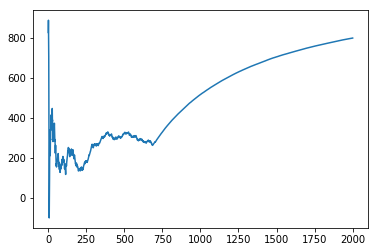

In [34]:
plt.plot(df['Time'], df['Average Rewards'])

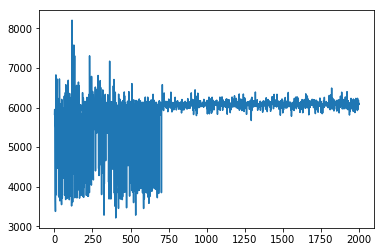

In [35]:
plt.plot(df['Time'], df['Balance'])

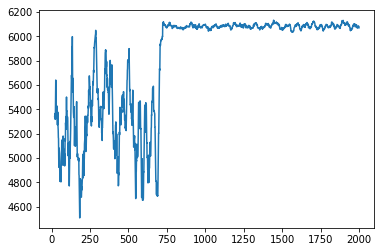

In [36]:
# Rolling mean is use to reduce price volatility
plt.plot(df['Time'], df['Balance'].rolling(20).mean())

In [37]:
# Testing random agent
environment.reset()

random_trades = pd.DataFrame(columns=['Time','Profit'])
profit = 0
for e in range(len(train_set)-1):
    action = np.random.randint(3)

    next_state, reward, done = environment.step(action)
    profit += reward
    random_trades.loc[e] =  [e, environment.final_balance]
    
print(environment.final_balance)

3771.212687985128


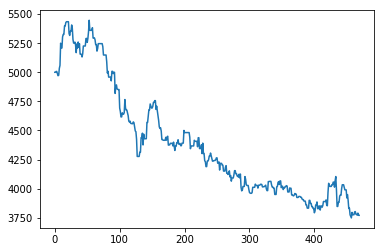

In [38]:
plt.plot(random_trades['Time'], random_trades['Profit'])

In [39]:
# Testing our trading agent
state = environment.reset()

rf_trades = pd.DataFrame(columns=['Time','Profit'])
profit = 0
for e in range(len(train_set)-1):
    action = agent.act(state)

    next_state, reward, done = environment.step(action)        
    profit += reward
    rf_trades.loc[e] = [e, environment.final_balance]
    state = next_state
print(environment.final_balance)

6032.391813637488


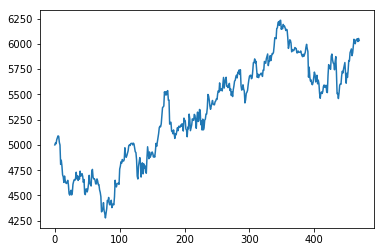

In [40]:
plt.plot(rf_trades['Time'], rf_trades['Profit'])

In [41]:
# Testing buy and hold strategy
environment.reset()

buyhold_trades = pd.DataFrame(columns=['Time','Profit'])
profit = 0
for e in range(len(train_set)-1):
    
    if e == 0:
        action = 1
    else:
        action = 0
        
    next_state, reward, done = environment.step(action)
    profit += reward
    buyhold_trades.loc[e] = [e, environment.final_balance]
  
print(environment.final_balance)

6090.79445145019


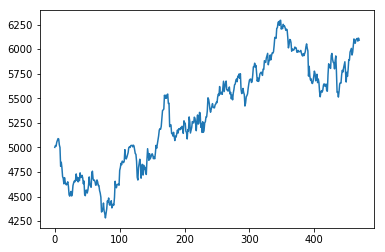

In [42]:
plt.plot(buyhold_trades['Time'], buyhold_trades['Profit'])

In [43]:
# Testing our trading agent on unseen data
state = environment.reset_data(5000, test_set)

rf_trades = pd.DataFrame(columns=['Time','Profit'])
profit = 0
for e in range(len(test_set)-1):
    action = agent.act(state)
    next_state, reward, done = environment.step(action)        
    profit += reward
    rf_trades.loc[e] = [e, environment.final_balance] 
    state = next_state
print(environment.final_balance)

5521.0022107590285


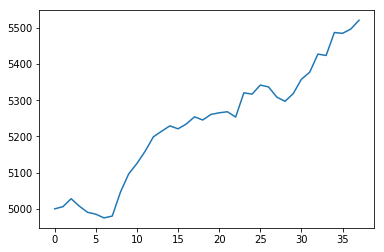

In [44]:
plt.plot(rf_trades['Time'], rf_trades['Profit'])